In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

allages = pd.read_csv('/Users/apple/Documents/GitHub/YunlongWei_Homework/Lecture_4_majors/archive/all-ages.csv')
gardstu = pd.read_csv('/Users/apple/Documents/GitHub/YunlongWei_Homework/Lecture_4_majors/archive/grad-students.csv')
major_list = pd.read_csv('/Users/apple/Documents/GitHub/YunlongWei_Homework/Lecture_4_majors/archive/majors-list.csv')
recgards = pd.read_csv('/Users/apple/Documents/GitHub/YunlongWei_Homework/Lecture_4_majors/archive/recent-grads.csv')
womenstem = pd.read_csv('/Users/apple/Documents/GitHub/YunlongWei_Homework/Lecture_4_majors/archive/women-stem.csv')

In [2]:
lowest_unemp_rate = allages.loc[allages['Unemployment_rate'].idxmin()]
print(f"Major with the lowest unemployment rate: {lowest_unemp_rate['Major']} with a rate of {lowest_unemp_rate['Unemployment_rate']}")


Major with the lowest unemployment rate: EDUCATIONAL ADMINISTRATION AND SUPERVISION with a rate of 0.0


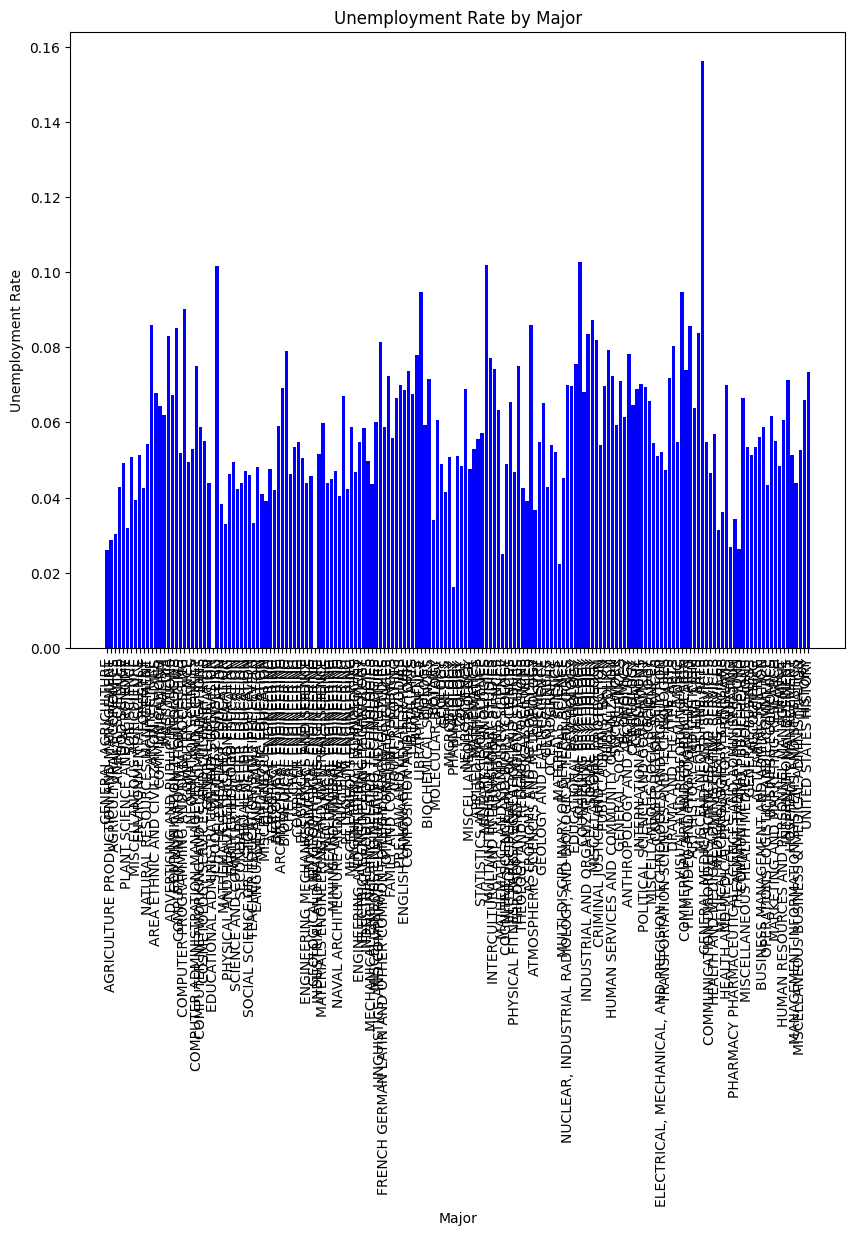

In [3]:
plt.figure(figsize=(10, 8))
plt.bar(allages['Major'], allages['Unemployment_rate'], color='blue')
plt.xlabel('Major')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate by Major')
plt.xticks(rotation=90)
plt.show()

In [4]:
womenstem['ShareWomen'] = (womenstem['Women'] / (womenstem['Men'] + womenstem['Women'])) * 100
max_women_major = womenstem.loc[womenstem['ShareWomen'].idxmax()]
print(f"Major with the highest percentage of women: {max_women_major['Major']} with {max_women_major['ShareWomen']}% women")


Major with the highest percentage of women: COMMUNICATION DISORDERS SCIENCES AND SERVICES with 96.7998119073121% women


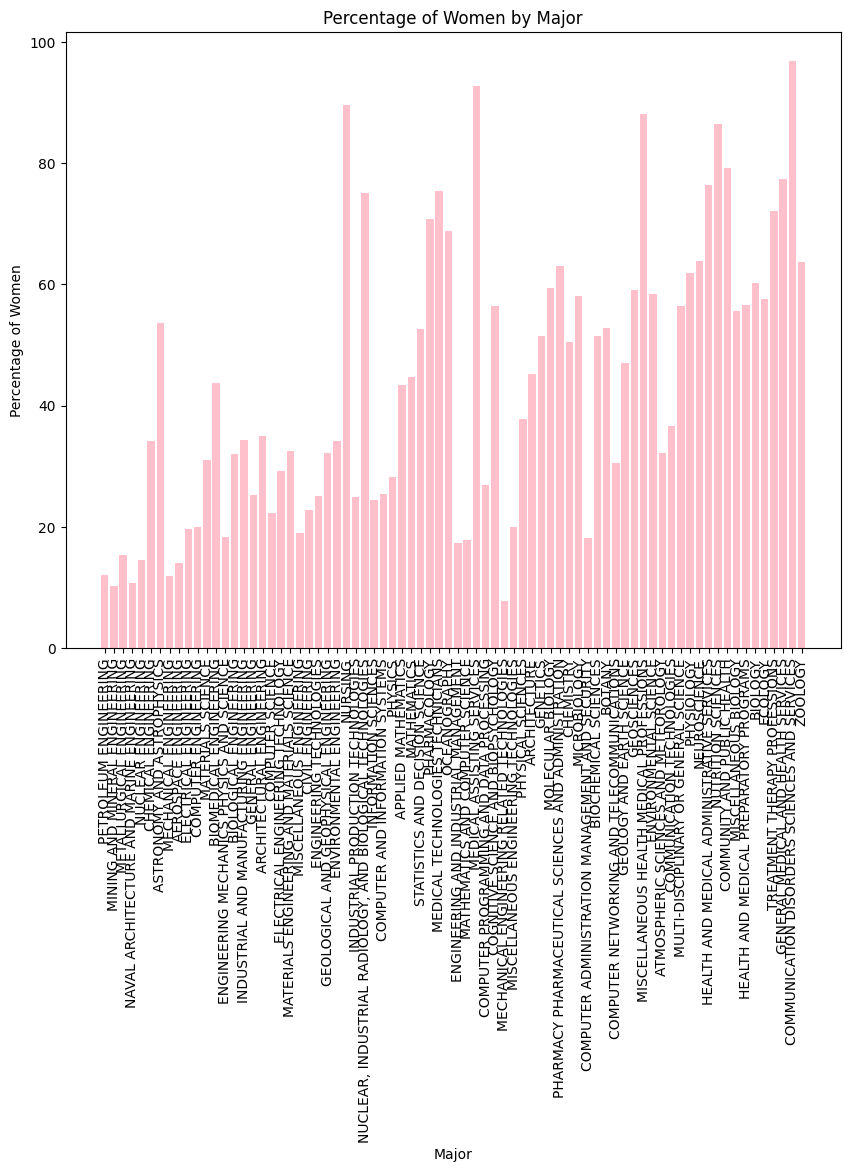

In [5]:
plt.figure(figsize=(10, 8))
plt.bar(womenstem['Major'], womenstem['ShareWomen'], color='pink')
plt.xlabel('Major')
plt.ylabel('Percentage of Women')
plt.title('Percentage of Women by Major')
plt.xticks(rotation=90)
plt.show()

In [6]:
median_income_by_category = allages.groupby('Major_category')['Median'].median()
print("Median income by major category:")
print(median_income_by_category)

Median income by major category:
Major_category
Agriculture & Natural Resources        53000.0
Arts                                   45000.0
Biology & Life Science                 51500.0
Business                               60000.0
Communications & Journalism            50000.0
Computers & Mathematics                66000.0
Education                              42800.0
Engineering                            75000.0
Health                                 50000.0
Humanities & Liberal Arts              46000.0
Industrial Arts & Consumer Services    48000.0
Interdisciplinary                      43000.0
Law & Public Policy                    50000.0
Physical Sciences                      60000.0
Psychology & Social Work               45000.0
Social Science                         52000.0
Name: Median, dtype: float64


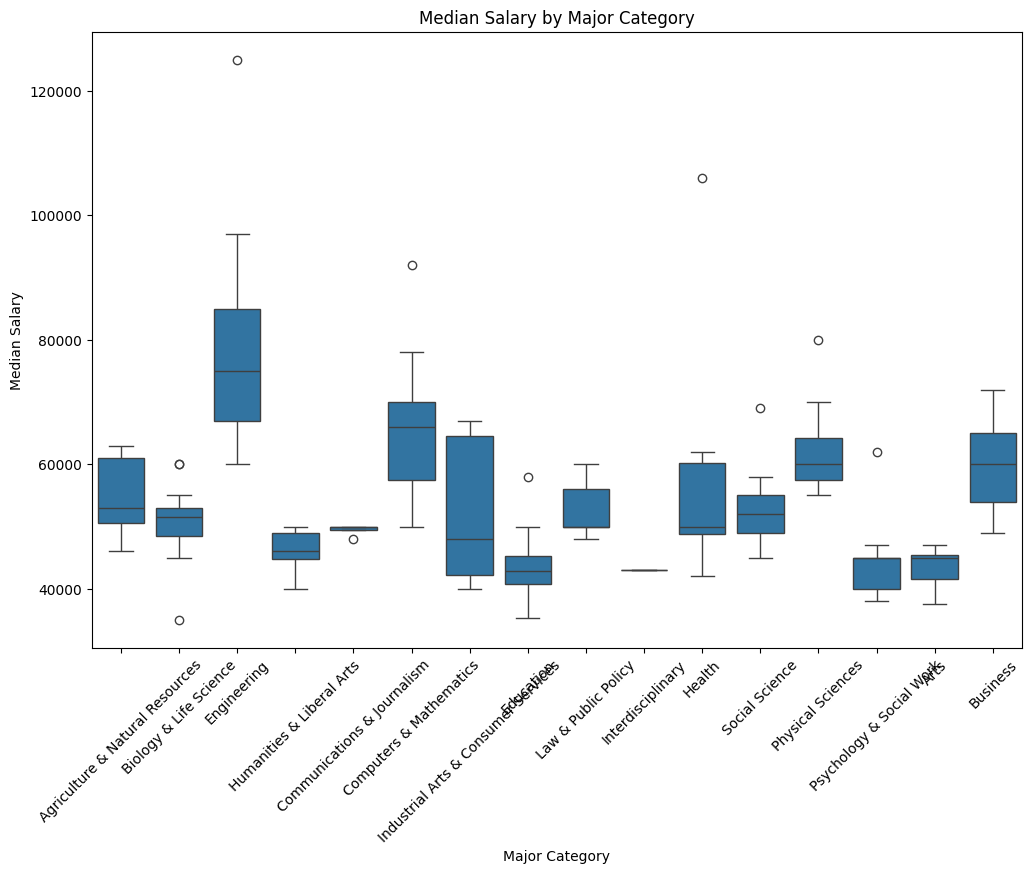

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Major_category', y='Median', data=allages)
plt.xlabel('Major Category')
plt.ylabel('Median Salary')
plt.title('Median Salary by Major Category')
plt.xticks(rotation=45)
plt.show()

In [8]:
threshold = 50
high_women_median_income = womenstem[womenstem['ShareWomen'] > threshold]['Median'].median()
low_women_median_income = womenstem[womenstem['ShareWomen'] <= threshold]['Median'].median()

if high_women_median_income > low_women_median_income:
    print("Women tend to choose majors with higher earnings.")
else:
    print("Women tend to choose majors with lower earnings.")

Women tend to choose majors with lower earnings.


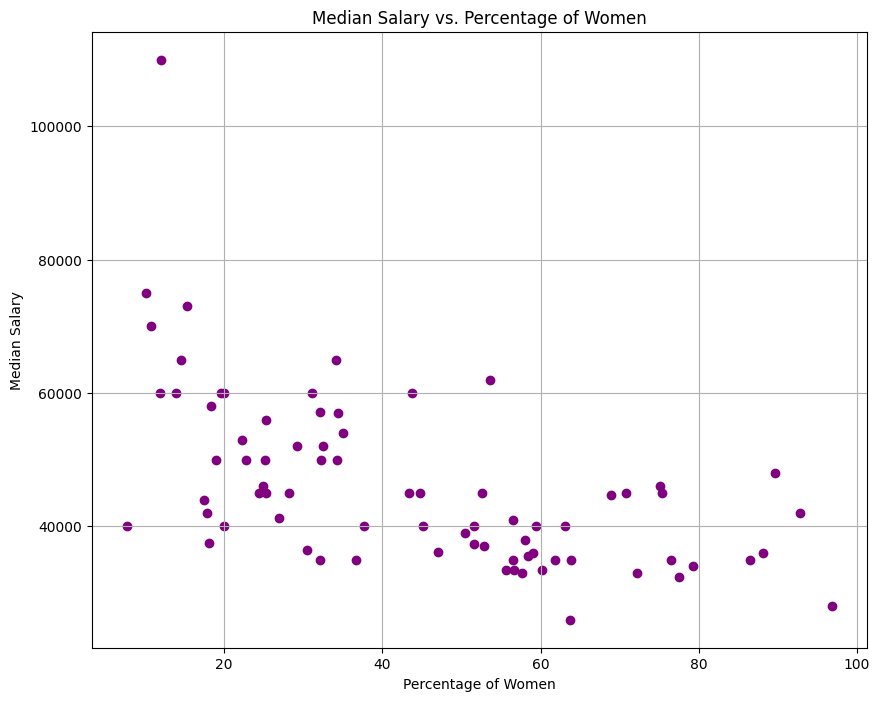

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(womenstem['ShareWomen'], womenstem['Median'], color='purple')
plt.xlabel('Percentage of Women')
plt.ylabel('Median Salary')
plt.title('Median Salary vs. Percentage of Women')
plt.grid(True)
plt.show()